# Demo: Geo Mapping with Plotly - Choropleth

The process of producing visual representations of geographic data, frequently on a map or in another geographical context, is referred to as **geo-mapping**. Depending on their geographic coordinates, points, lines, or **areas** can be displayed on a map.

[Choropleth Maps](https://datavizcatalogue.com/methods/choropleth.html) display divided **geographical areas or regions that are coloured, shaded or patterned in relation to a data variable**. This provides a way to visualise values over a geographical area, which can show variation or patterns across the displayed location.

The **data variable** uses colour progression to represent itself in each region of the map. Typically, this can be a blending from one colour to another, a single hue progression, transparent to opaque, light to dark or an entire colour spectrum.

> One downside to the use of colour is that *you can't accurately read or compare values from the map*.   
> Another issue is that larger regions appear more emphasised then smaller ones, so the viewer's perception of the shaded values are affected.  
> A common error when producing Choropleth Maps is to encode raw data values (such as population) rather than using normalized values (calculating population per square kilometre for example) to produce a density map.

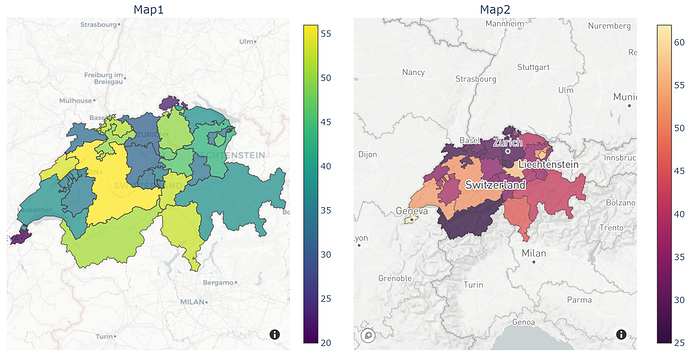

## Plotly
**Plotly** is an open source library for Python. It integrates greatly with Jupyter Notebook and Dash to create interactive content for websites. It can be used to create ad hoc charts and professional content.

Handling spatial data for Geo Mapping needs some additional datasets and basic setup before you can use it for visual data representation and analysis.

E.g.Choropleth Charts are colored shapes and those shapes are of course manyfold. If you read through [Plotly Documentation](https://plotly.com/python/choropleth-maps/) you can see that there are default shapes available in plotly for USA States and Countries as defined in the Natural Earth datasets.

To visualize data for Switzerland geo regions like **cantons**, **districts** or **municipalities**, we must explore other data sources for corresponding shapes to handle with.

---   
Source/Links:   
+ [Choropleth Mapping](https://geographicdata.science/book/notebooks/05_choropleth.html)
+ [Cartography - Choropleth Maps](https://storymaps.arcgis.com/collections/bc79ea24ec354f77bfa7616b247ac986?item=3)
+ [Introduction to Cartography - Choropleth Maps](https://alg.manifoldapp.org/read/introduction-to-cartography/section/c3c06272-8b8b-49e7-a957-da0d06550b73#3-part-1)
+ [Datawrapper Academy - Choropleth  Maps](https://academy.datawrapper.de/category/93-maps)  
<br>  
+ [Geo Data + GeoJSON](https://handsondataviz.org/geojson.html)
+ [GeoJSON and JavaScript: A Developer's Handbook for Geographic Data](https://www.geoapify.com/geojson-javascript-developer-guide)
+ [Download GeoJSON Countries of the World](https://geojson-maps.kyd.au/)
+ [geojson.io](https://geojson.io/#map=2/0/20) a quick, simple tool for creating, viewing, and sharing spatial data
+ Find [GeoJSON Boundary Files](https://handsondataviz.org/find-geojson.html) in "Hands-On Data Visualization" from O'Reilly

History:       
+ March 2024, v1, dbe --- initial version for BINA FS24

---  

## Introduction

### What to consider when creating **choropleth maps**

Maps are not objective, but a version of reality. When creating them, lots of choices are made: *What to map, how to map and whether or not to use a map in the first place?*

+ **Choropleth maps are great to show a clear regional pattern in the data, or for local data**. Regional patterns could be an unusually high unemployment rate in neighboring counties or the contrast between cities and rural areas. If your data doesn’t show a clear regional pattern, consider another chart type for your data.  

+ **Choropleth maps work best when showing just one variable.** This variable could be the difference between two variables (e.g. the change of the unemployment rate from last year to this year). But if you want to show the correlation between values, choropleth maps might be not your best choice. Consider a dot plot or scatterplot instead.  

+ **Choropleth maps are great to see the big picture, but not for subtle differences.** Readers will have a hard time perceiving the small differences between colors on your map. In addition, the intervals between the colors are not necessarily the same intervals between the values in your data. That makes it easier to recognize patterns in the map, but makes it harder to compare the exact values of regions with each other. If you want to point out the numeric differences between regions, consider another chart type, a table or text instead. That also applies if your most important regions are too small to be shown on a map.   

+ **Choropleth maps work best for relative data.** It would not be useful to map the absolute number of unemployed people in each county since we can’t compare that data without knowing the counties’ population. The unemployment rate (the number of unemployed people per 100 citizens) is more comparable. If you want to map absolute data, consider a symbol map instead. Be aware though, that this will often just answer the question “Where do most people live?”.


### How to make your choropleth maps better  

+ **Consider cartograms if it’s important how many people are affected.** Choropleth maps show us how much geographic area is affected. On some maps, this means that large regions where only a few people take up a lot of space on the screen. Population cartograms, on the other hand, drive more attention to populated areas. In countries with a very different population density in each state, cartograms can offer a more honest view of the data. However, be aware that cartograms make it harder for readers to recognize regions, so they work best if readers are familiar with the geography.  

+ **Consider choosing the smallest units possible.** If you can use counties instead of states or NUTS2 regions instead of European countries, consider doing so. It will give readers a more refined image of the data and will let them spot more regional patterns. There are exceptions: For example, a state map is more informative in the winner-takes-it-all-system in the US presidential elections.   

+ **Make sure to use the right color scheme for your data.** There are three different kinds of color schemes for maps:
 + Sequential (e.g. from bright blue to dark blue),
 + diverging (e.g. from red via white to blue),
 + and qualitative/categorical (e.g. one green color, one blue color).  

  Consider a sequential color scheme if you want to drive attention to the high values, e.g. for unemployment rates. Consider a diverging scheme if you want to drive the attention to both extremes of the scale, e.g. too show the difference in votes between two competing parties. **With any color scheme, do use colorblind-friendly colors.**  

+ **Consider using as few as possible colors in your qualitative color schemes.** The more colors you use in your map, the harder it becomes for your readers to remember what they mean. Using only three colors means that your reader won’t need to check your color key too often. The colors shouldn’t give the idea of a sequential or diverging color scheme, if your data isn’t ordered in any way. You can use more than three colors if the reader already knows your color encoding, e.g. with colors of political parties.

+ **Spend time thinking about your color key.** Color keys are crucial for readers to understand your map. Make sure that they are quickly decipherable: Keys for sequential color schemes should show the colors for the lowest and highest values; plus two to four colors in between.

+ **Consider using tooltips and labels.** Tooltips are a great option to communicate the name and the underlying value of each region, since they will be hard to read otherwise. Tooltips also work well to communicate extra information about regions and remind reader’s what they’re seeing. Labels get more important the less your readers will know about the area you’re mapping.

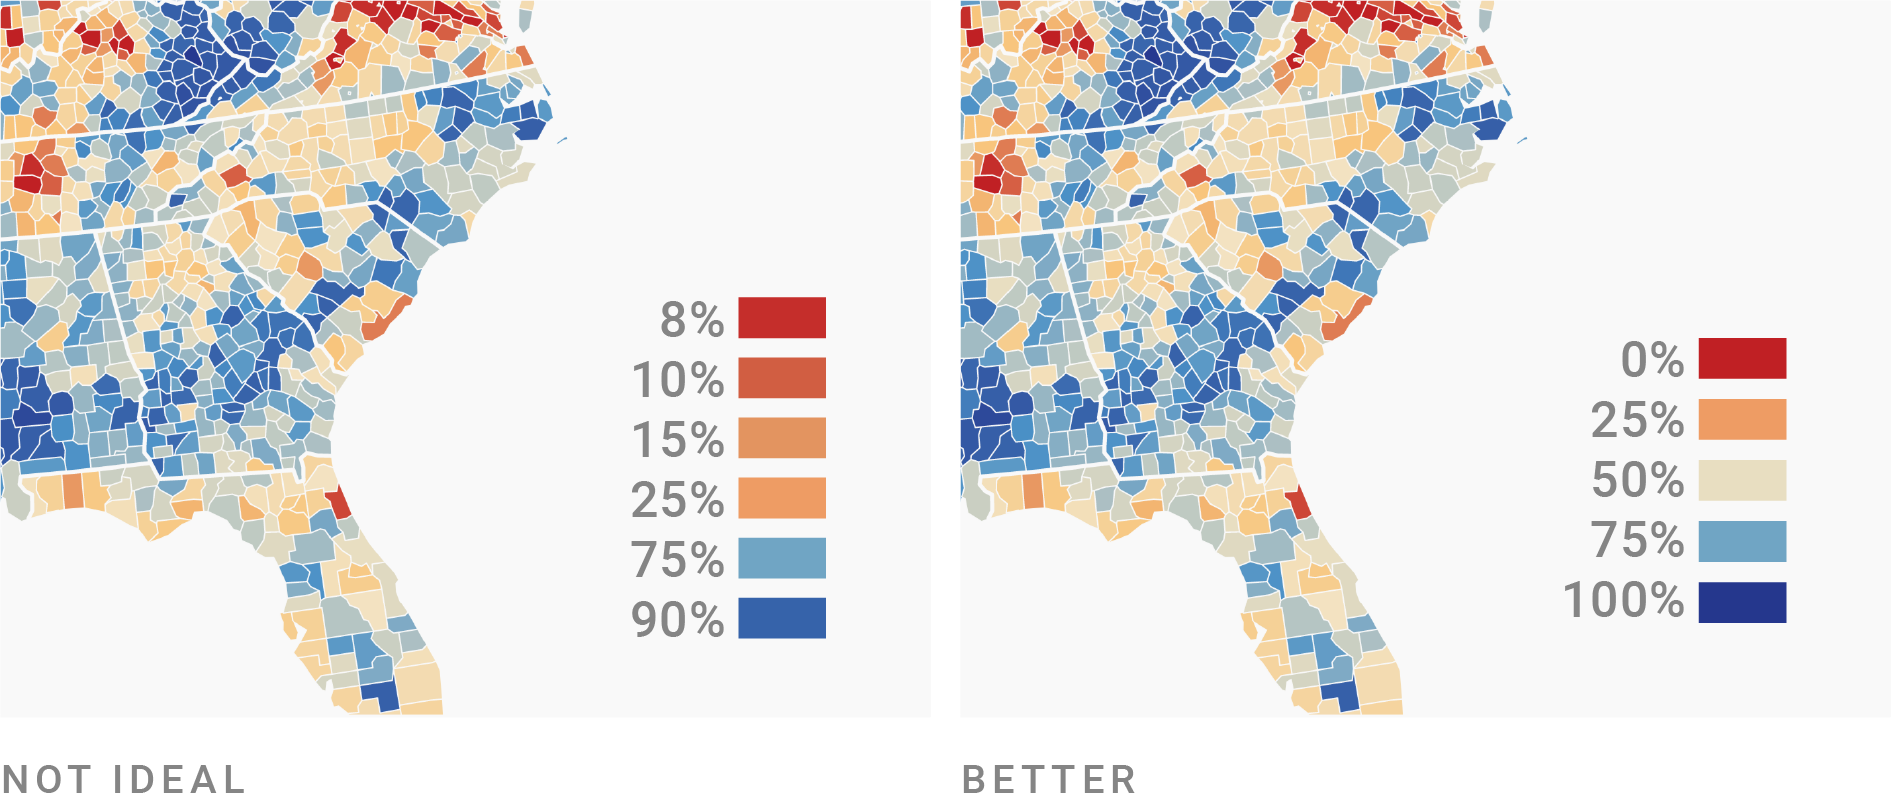

---
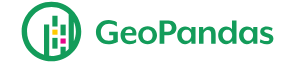

### What is GeoPandas?  

The goal of **GeoPandas** is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

GeoPandas, as the name suggests, extends the popular data science library pandas by adding support for geospatial data.

**The core data structure in GeoPandas is the `geopandas.GeoDataFrame`**, a subclass of pandas.DataFrame, that can store geometry columns and perform spatial operations.

**The `geopandas.GeoSeries`, a subclass of pandas.Series, handles the geometries.**

Therefore, your GeoDataFrame is a combination of `pandas.Series`, with traditional data (numerical, boolean, text etc.), and `geopandas.GeoSeries`, with geometries (points, polygons etc.).  

You can have as many columns with geometries as you wish; there’s no limit typical for desktop GIS software.

+ see [GeoPandas.org](https://geopandas.org/en/stable/#) for more documentation

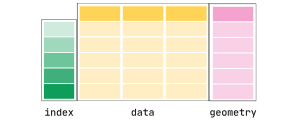

---  
## **Example 1:** A Swiss Choropleth Plot Map using Swiss Cantons


In [1]:
!pip install pandas_geojson

In [3]:
import geopandas as gpd

# GeoJSON file with Swiss Canton Polygon geometries
#g eojson_file = 'sample_data/georef-switzerland-kanton.geojson'
# geojson_file = 'https://raw.githubusercontent.com/mikpan/ch-maps/master/geo/ch.geojson'
# geojson_file = 'https://raw.githubusercontent.com/mikpan/ch-maps/master/geo/ch-plz.geojson'

geojson_file = 'https://raw.githubusercontent.com/sawubona-repo/DATA-CH-Maps/master/topo/ch-cantons.json'

# geojson_file = 'https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/zDiversExamples/Notebook-GeoMapping/DATA/ch-cantons.geojson'

# Read GeoJSON file into GeoDataFrame
geodf = gpd.read_file(geojson_file)
geodf

,id,geometry
0,1,"POLYGON ((8.42643 47.56754, 8.43183 47.56650, ..."
1,2,"MULTIPOLYGON (((7.22145 46.32921, 7.22290 46.3..."
2,3,"POLYGON ((8.41215 47.14074, 8.41668 47.13061, ..."
3,4,"POLYGON ((8.67873 46.57919, 8.66666 46.57658, ..."
4,5,"POLYGON ((8.57122 46.99016, 8.54278 46.97957, ..."
5,6,"MULTIPOLYGON (((8.36887 46.78797, 8.35998 46.7..."
6,7,"POLYGON ((8.47198 46.85536, 8.46309 46.85532, ..."
7,8,"POLYGON ((9.00455 47.17315, 9.00577 47.17412, ..."
8,9,"POLYGON ((8.49298 47.10020, 8.49370 47.11374, ..."
9,10,"MULTIPOLYGON (((7.05185 46.97712, 7.08959 46.9..."


In [4]:
import numpy as np
np.random.seed(42)

geodf2 = geodf

geodf2["plz"] = np.random.randint(1000, 9999, geodf2.shape[0])
geodf2

,id,geometry,plz
0,1,"POLYGON ((8.42643 47.56754, 8.43183 47.56650, ...",8270
1,2,"MULTIPOLYGON (((7.22145 46.32921, 7.22290 46.3...",1860
2,3,"POLYGON ((8.41215 47.14074, 8.41668 47.13061, ...",6390
3,4,"POLYGON ((8.67873 46.57919, 8.66666 46.57658, ...",6191
4,5,"POLYGON ((8.57122 46.99016, 8.54278 46.97957, ...",6734
5,6,"MULTIPOLYGON (((8.36887 46.78797, 8.35998 46.7...",7265
6,7,"POLYGON ((8.47198 46.85536, 8.46309 46.85532, ...",1466
7,8,"POLYGON ((9.00455 47.17315, 9.00577 47.17412, ...",5426
8,9,"POLYGON ((8.49298 47.10020, 8.49370 47.11374, ...",6578
9,10,"MULTIPOLYGON (((7.05185 46.97712, 7.08959 46.9...",9322


In [5]:
import plotly.express as px

In [6]:
# Create Mapbox GL plot
fig = px.choropleth_mapbox(
    geodf2,
    geojson=geodf2.geometry,
    locations=geodf2.index,
    color='plz',
    center=dict(lat=46.94809, lon=7.44744),     # capital Bern as map center
    zoom=6,
    mapbox_style="carto-positron"
)

fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
fig.show()

In [7]:
geodf2.to_file("sample_data/ch-cantons-test.geojson", layer_options={"ID_GENERATE": "YES"})

In [8]:
geojson_file2 = 'sample_data/ch-cantons-test.geojson'

# Read GeoJSON file into GeoDataFrame
geodfNew = gpd.read_file(geojson_file2)
geodfNew

,id,plz,geometry
0,1,8270,"POLYGON ((8.42643 47.56754, 8.43183 47.56650, ..."
1,2,1860,"MULTIPOLYGON (((7.22145 46.32921, 7.22290 46.3..."
2,3,6390,"POLYGON ((8.41215 47.14074, 8.41668 47.13061, ..."
3,4,6191,"POLYGON ((8.67873 46.57919, 8.66666 46.57658, ..."
4,5,6734,"POLYGON ((8.57122 46.99016, 8.54278 46.97957, ..."
5,6,7265,"MULTIPOLYGON (((8.36887 46.78797, 8.35998 46.7..."
6,7,1466,"POLYGON ((8.47198 46.85536, 8.46309 46.85532, ..."
7,8,5426,"POLYGON ((9.00455 47.17315, 9.00577 47.17412, ..."
8,9,6578,"POLYGON ((8.49298 47.10020, 8.49370 47.11374, ..."
9,10,9322,"MULTIPOLYGON (((7.05185 46.97712, 7.08959 46.9..."


---   
---  

In [11]:
import pandas_geojson as pdg
ch_geojson = pdg.read_geojson('sample_data/ch-cantons-test.geojson')
type(ch_geojson)

pandas_geojson.core.GeoJSON

In [12]:
import geopandas as gpd


In [13]:
filePATH = 'sample_data/ch-cantons-test.geojson'
ch_df = gpd.read_file(filePATH)

---  

In [ ]:
import pandas as pd
import json
ch_csv = pd.read_csv('sample_data/ch-cantons.csv')
ch_csv.head()

ParserError: Error tokenizing data. C error: Expected 6486 fields in line 3, saw 8148


---   
---  
## Plotting with **GeoPandas**
---

In [14]:
%cd sample_data
%ls

/content/sample_data
anscombe.json*               california_housing_train.csv  mnist_test.csv         README.md*
california_housing_test.csv  ch-cantons-test.geojson       mnist_train_small.csv


In [15]:
!pip install geopandas

In [ ]:
import geopandas
import matplotlib.pyplot as plt

In [ ]:
# Read the shapefile and related data
gdf = geopandas.read_file( "swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shp" )

In [ ]:
# Plot the map
ax = gdf.plot()

# Remove axes and margins
ax.margins( 0 )
plt.axis( "off" )

# Save plot as SVG
#plt.savefig( "gpfirst.svg", bbox_inches="tight", pad_inches=0.1 )

plt.show()

NameError: name 'gdf' is not defined

---  
---   

In [ ]:
!pip install requests

In [ ]:
import json
import urllib
import requests

In [ ]:
url = 'https://parseapi.back4app.com/classes/City?count=1&limit=10000&order=adminCode'
headers = {
    'X-Parse-Application-Id': 'LNUbiEknPe9WzqxtcjR4NgBd2ZE4LikfbyNWskBG', # This is the fake app's application id
    'X-Parse-Master-Key': 's7F3hkDX0AU1pSKuwbNLHm2SyhRHR7YJEJYr8fYb' # This is the fake app's readonly master key
}

data = json.loads(requests.get(url, headers=headers).content.decode('utf-8')) # Here you have the data that you need
print(json.dumps(data, indent=20))

In [ ]:
# Serializing json
json_object = json.dumps(data, indent=4)

# Writing to sample.json
with open("ch-cities.json", "w") as outfile:
    outfile.write(json_object)

In [ ]:
import pandas as pd
from pandas import json_normalize

In [ ]:
dataDF = json_normalize(data['results'])

In [ ]:
storeFILE = 'sample_data/ch-cities.csv'
dataDF.to_csv(storeFILE, sep=',', index=False, encoding='utf-8' )